In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Dropout, Flatten, Input



Using TensorFlow backend.


In [3]:
RED  = '#C82506'
BLUE = '#0365C0'
GREEN = '#00882B'
ORANGE = '#DE6A10'
PURPLE = '#773F9B'
YELLOW = '#DCBD23'

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def clean(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
def ca(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', top='off', right='off', left='off',
    labelbottom='off', labelleft='off') # labels along the bottom edge are off
    

def center(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom='off', labelleft='off')
    
    ax.set_aspect('equal')
    


In [4]:
from keras.layers import Reshape, UpSampling2D


hidden_size = 64

encoded = Input(shape=(hidden_size,))

x = Dense(256, activation='relu')(encoded)
x = Reshape((4,4,16))(x)

x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((4, 4))(x)
decoded = Conv2D(3, (4, 4), activation='sigmoid', padding='same')(x)

decoder = Model(encoded, decoded)

decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 16)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          4112      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        4112      
__________

(400, 64, 64, 3)


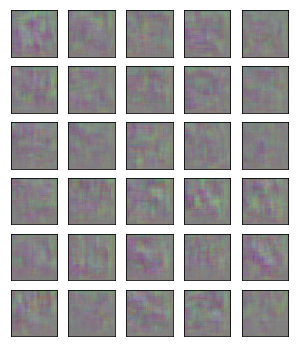

In [5]:
n = 30

z = np.random.randn(400, hidden_size)
y = decoder.predict(z)
print(y.shape)
# y = y.reshape(400, 64, 64)

fig = plt.figure(figsize=(5, 6))
# plot several images
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(y[i,...], cmap=plt.cm.gray)
    
plt.savefig('random-images-2.pdf')